In [2]:
import os

def count_images_in_classes(root_dir):
    print(f"Counting images in: {root_dir}")
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            count = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            print(f"{class_name}: {count} images")

# Count images in the 'combined' folder
count_images_in_classes('combined')


Counting images in: combined
CNV: 37454 images
DME: 11598 images
DRUSEN: 8866 images
NORMAL: 51390 images


## 1.Convert Grayscale Images to RGB

In [5]:
from PIL import Image
import os

base_dir = 'combined'  # Your original dataset directory (one folder per class)

# Convert all grayscale images to RGB and overwrite
for cls in os.listdir(base_dir):
    cls_path = os.path.join(base_dir, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img.save(img_path)
        except:
            print(f"Failed to process {img_path}")


## 2. Balance Dataset with Data Augmentation

In [7]:
import numpy as np
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

augmented_dir = 'balanced_data'
os.makedirs(augmented_dir, exist_ok=True)

# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in os.listdir(base_dir)}
max_count = max(class_counts.values())

# Create augmentation generator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                             height_shift_range=0.1, zoom_range=0.1,
                             horizontal_flip=True, fill_mode='nearest')

# Copy and augment
for cls, count in class_counts.items():
    src = os.path.join(base_dir, cls)
    dst = os.path.join(augmented_dir, cls)
    os.makedirs(dst, exist_ok=True)

    # Copy original images
    for file in os.listdir(src):
        shutil.copy(os.path.join(src, file), dst)

    # Augment if needed
    if count < max_count:
        image_files = os.listdir(src)
        num_to_generate = max_count - count
        generated = 0

        while generated < num_to_generate:
            fname = random.choice(image_files)
            img_path = os.path.join(src, fname)
            img = Image.open(img_path).convert('RGB')
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)
            gen = datagen.flow(x, batch_size=1, save_to_dir=dst, save_prefix='aug', save_format='jpg')
            next(gen)
            generated += 1


In [9]:
import os

def count_images_in_classes(root_dir):
    print(f"Counting images in: {root_dir}")
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            count = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            print(f"{class_name}: {count} images")

# Count images in the 'combined' folder
count_images_in_classes('balanced_data')


Counting images in: balanced_data
CNV: 44953 images
DME: 21404 images
DRUSEN: 18723 images
NORMAL: 51390 images


In [10]:
base_dir='balanced_data'
import numpy as np
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

augmented_dir = 'balanced_data1'
os.makedirs(augmented_dir, exist_ok=True)

# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in os.listdir(base_dir)}
max_count = max(class_counts.values())

# Create augmentation generator
datagen = datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Copy and augment
for cls, count in class_counts.items():
    src = os.path.join(base_dir, cls)
    dst = os.path.join(augmented_dir, cls)
    os.makedirs(dst, exist_ok=True)

    # Copy original images
    for file in os.listdir(src):
        shutil.copy(os.path.join(src, file), dst)

    # Augment if needed
    if count < max_count:
        image_files = os.listdir(src)
        num_to_generate = max_count - count
        generated = 0

        while generated < num_to_generate:
            fname = random.choice(image_files)
            img_path = os.path.join(src, fname)
            img = Image.open(img_path).convert('RGB')
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)
            gen = datagen.flow(x, batch_size=1, save_to_dir=dst, save_prefix='aug', save_format='jpg')
            next(gen)
            generated += 1


In [11]:
import os

def count_images_in_classes(root_dir):
    print(f"Counting images in: {root_dir}")
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            count = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            print(f"{class_name}: {count} images")

# Count images in the 'combined' folder
count_images_in_classes('balanced_data1')


Counting images in: balanced_data1
CNV: 46162 images
DME: 21592 images
DRUSEN: 18862 images
NORMAL: 51390 images


In [12]:
from PIL import Image
import numpy as np
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

base_dir = 'balanced_data1'
augmented_dir = 'balanced_data2'
os.makedirs(augmented_dir, exist_ok=True)

# Set up aggressive data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Count original class sizes
class_counts = {cls: len([f for f in os.listdir(os.path.join(base_dir, cls)) if f.lower().endswith(('png', 'jpg', 'jpeg'))]) for cls in os.listdir(base_dir)}
max_count = max(class_counts.values())

# Process each class
for cls, count in class_counts.items():
    src = os.path.join(base_dir, cls)
    dst = os.path.join(augmented_dir, cls)
    os.makedirs(dst, exist_ok=True)

    # Copy original images
    for file in os.listdir(src):
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            shutil.copy(os.path.join(src, file), dst)

    # Augment until total in dst reaches max_count
    current_count = len(os.listdir(dst))
    image_files = [f for f in os.listdir(src) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    gen = None

    while current_count < max_count:
        fname = random.choice(image_files)
        img_path = os.path.join(src, fname)

        img = Image.open(img_path).convert('RGB')
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        gen = datagen.flow(
            x,
            batch_size=1,
            save_to_dir=dst,
            save_prefix='aug',
            save_format='jpg'
        )

        next(gen)
        current_count += 1


In [13]:
import os

def count_images_in_classes(root_dir):
    print(f"Counting images in: {root_dir}")
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            count = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            print(f"{class_name}: {count} images")

# Count images in the 'combined' folder
count_images_in_classes('balanced_data2')


Counting images in: balanced_data2
CNV: 46722 images
DME: 21598 images
DRUSEN: 18866 images
NORMAL: 51390 images


In [2]:
import os
import cv2
import random
import numpy as np
import albumentations as A
from tqdm import tqdm

# Your base data directory (e.g., 'balanced_data')
base_dir = 'balanced_data2'
output_dir = 'augmented_balanced_data'
os.makedirs(output_dir, exist_ok=True)

# Define the augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Transpose(),
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.3),
    A.RGBShift(p=0.2),
    A.Blur(blur_limit=3, p=0.2),
    A.MotionBlur(p=0.2),
    A.GaussNoise(p=0.3),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
    A.GridDistortion(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.5),
])

# Helper to count image files
def image_count(folder):
    return len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Step 1: Count images in each class
class_counts = {}
for cls in os.listdir(base_dir):
    cls_path = os.path.join(base_dir, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = image_count(cls_path)

max_count = max(class_counts.values())
print("Max class count:", max_count)

# Step 2: Augment underrepresented classes
for cls, count in class_counts.items():
    src = os.path.join(base_dir, cls)
    dst = os.path.join(output_dir, cls)
    os.makedirs(dst, exist_ok=True)

    # Copy original images first
    for file in os.listdir(src):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(os.path.join(src, file), cv2.IMREAD_GRAYSCALE)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            cv2.imwrite(os.path.join(dst, file), img_rgb)

    # Skip augmentation if already at max
    if count >= max_count:
        continue

    print(f"Augmenting class '{cls}' from {count} to {max_count} images...")
    existing_files = [f for f in os.listdir(src) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    generated = 0

    with tqdm(total=(max_count - count), desc=f"Augmenting {cls}") as pbar:
        while image_count(dst) < max_count:
            img_file = random.choice(existing_files)
            img_path = os.path.join(src, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            augmented = transform(image=img_rgb)['image']
            new_filename = f"{os.path.splitext(img_file)[0]}_aug_{generated}.jpg"
            cv2.imwrite(os.path.join(dst, new_filename), augmented)

            generated += 1
            pbar.update(1)

print("✅ Data balancing complete.")


C:\Users\DELL\AppData\Local\Temp\ipykernel_15364\1123668820.py:25: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
c:\Users\DELL\anaconda3\envs\eyediseaseclassification_env\lib\site-packages\albumentations\core\validation.py:111: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Max class count: 51390
Augmenting class 'CNV' from 46722 to 51390 images...


Augmenting CNV: 100%|██████████| 4668/4668 [07:52<00:00,  9.87it/s]


Augmenting class 'DME' from 21598 to 51390 images...


Augmenting DME: 100%|██████████| 29792/29792 [1:03:51<00:00,  7.78it/s]   


Augmenting class 'DRUSEN' from 18866 to 51390 images...


Augmenting DRUSEN: 100%|██████████| 32524/32524 [49:14<00:00, 11.01it/s]


✅ Data balancing complete.


In [3]:
import os

def count_images_in_classes(root_dir):
    print(f"Counting images in: {root_dir}")
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            count = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            print(f"{class_name}: {count} images")

# Count images in the 'combined' folder
count_images_in_classes('augmented_balanced_data')


Counting images in: augmented_balanced_data
CNV: 51390 images
DME: 51390 images
DRUSEN: 51390 images
NORMAL: 51390 images


In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set paths
source_dir = 'augmented_balanced_data'
output_dir = 'dataset_split'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# Create output folders
for split_dir in [train_dir, val_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Process each class folder
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    train_images, val_images = train_test_split(images, test_size=0.1, random_state=42)

    # Create class subfolders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    # Move training images
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy2(src, dst)

    # Move validation images
    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_dir, class_name, img)
        shutil.copy2(src, dst)

print("Dataset split into 90% train and 10% val successfully.")


Dataset split into 90% train and 10% val successfully.


In [2]:
import os

def count_images_per_class(base_dir):
    class_counts = {}
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ])
            class_counts[class_name] = num_images
    return class_counts

# Set train and val directories
train_dir = 'dataset_split/train'
val_dir = 'dataset_split/val'

# Get counts
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)

# Display results
print("Training Set Counts:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nValidation Set Counts:")
for cls, count in val_counts.items():
    print(f"{cls}: {count}")


Training Set Counts:
CNV: 46251
DME: 46251
DRUSEN: 46251
NORMAL: 46251

Validation Set Counts:
CNV: 5139
DME: 5139
DRUSEN: 5139
NORMAL: 5139


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Constants
IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
# Paths (change these if your dataset is in another location)
train_dir = 'dataset_split/train'  # 👈 Replace with your actual train path
val_dir = 'dataset_split/val'      # 👈 Replace with your actual val path


In [4]:
# ✅ Data Augmentation + Normalization for training
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


In [5]:
# ✅ Normalization for validation (no augmentation)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

In [6]:
# ✅ One-hot encoded data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 185004 images belonging to 4 classes.


In [7]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 20556 images belonging to 4 classes.


In [8]:
# ✅ Base model (EfficientNetB0)
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3))
)
base_model.trainable = False  # Freeze base for initial transfer learning


In [9]:
# ✅ Custom CNN head
x = base_model.output
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(4, activation='softmax')(x)


In [10]:

# ✅ Final model
model = Model(inputs=base_model.input, outputs=output)


In [11]:
# ✅ Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
# ✅ Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
5782/5782 [==============================] - 664s 115ms/step - loss: 0.1431 - accuracy: 0.9467 - val_loss: 0.2288 - val_accuracy: 0.9208
Epoch 2/10
5782/5782 [==============================] - 673s 116ms/step - loss: 0.1391 - accuracy: 0.9489 - val_loss: 0.2301 - val_accuracy: 0.9211
Epoch 3/10
5782/5782 [==============================] - 744s 129ms/step - loss: 0.1373 - accuracy: 0.9484 - val_loss: 0.2296 - val_accuracy: 0.9224
Epoch 4/10
5782/5782 [==============================] - 665s 115ms/step - loss: 0.1371 - accuracy: 0.9488 - val_loss: 0.2319 - val_accuracy: 0.9213
Epoch 5/10
5782/5782 [==============================] - 678s 117ms/step - loss: 0.1357 - accuracy: 0.9495 - val_loss: 0.2396 - val_accuracy: 0.9188
Epoch 6/10
5782/5782 [==============================] - 679s 117ms/step - loss: 0.1336 - accuracy: 0.9504 - val_loss: 0.2389 - val_accuracy: 0.9207
Epoch 7/10
5782/5782 [==============================] - 698s 121ms/step - loss: 0.1324 - accuracy: 0.9512 - val_

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# ✅ Ensure validation generator doesn't shuffle (to match order)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 20556 images belonging to 4 classes.


In [23]:
# ✅ Predict on validation set
y_pred_probs = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# ✅ Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


643/643 [==============================] - 50s 77ms/step
Classification Report:
              precision    recall  f1-score   support

         CNV       0.95      0.91      0.93      5139
         DME       0.91      0.91      0.91      5139
      DRUSEN       0.87      0.87      0.87      5139
      NORMAL       0.96      0.99      0.98      5139

    accuracy                           0.92     20556
   macro avg       0.92      0.92      0.92     20556
weighted avg       0.92      0.92      0.92     20556



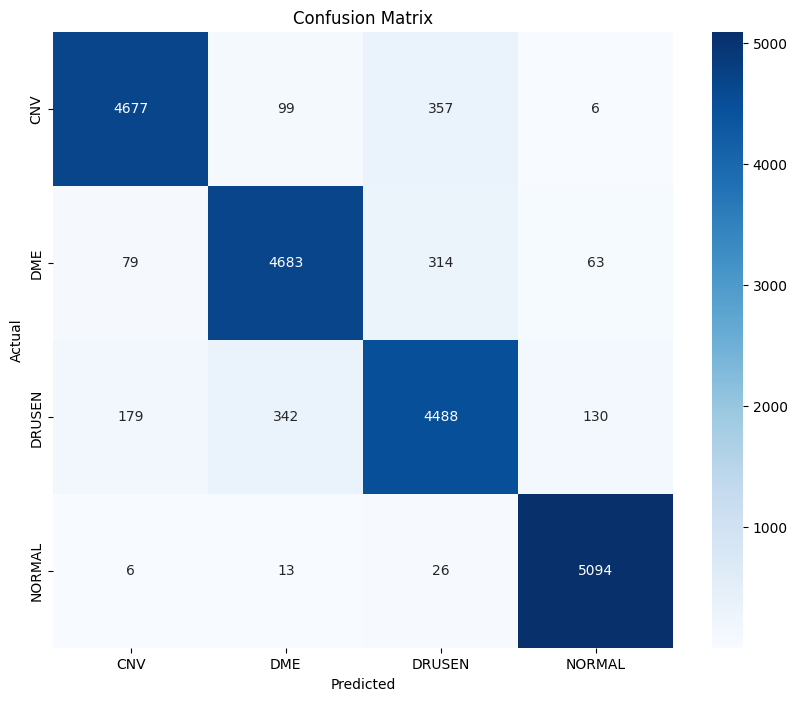

In [24]:
# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Path to the test image
img_path = "Screenshot 2025-05-03 032923.png"  # 👈 Replace with your image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)        # Normalize


In [27]:
# Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = np.max(predictions[0])


1/1 [==============================] - 1s 1s/step


In [28]:
# Get class label mapping
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

predicted_class_name = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class_name} (Confidence: {confidence:.2f})")


Predicted class: CNV (Confidence: 1.00)


In [29]:
print("Scanning inside model layers...")

for layer in model.layers:
    for attr_name in dir(layer):
        if attr_name.startswith("_"):
            continue
        try:
            attr_value = getattr(layer, attr_name)
        except Exception:
            continue  # Skip attributes that throw errors

        if isinstance(attr_value, tf.Tensor):
            print(f"⚡ Found Tensor in layer '{layer.name}' attribute: '{attr_name}'")
        elif isinstance(attr_value, (list, tuple)):
            for item in attr_value:
                if isinstance(item, tf.Tensor):
                    print(f"⚡ Found Tensor inside list/tuple in layer '{layer.name}' attribute: '{attr_name}'")
        elif isinstance(attr_value, dict):
            for key, item in attr_value.items():
                if isinstance(item, tf.Tensor):
                    print(f"⚡ Found Tensor inside dict in layer '{layer.name}' at key '{key}'")


Scanning inside model layers...
⚡ Found Tensor in layer 'normalization' attribute: 'mean'
⚡ Found Tensor in layer 'normalization' attribute: 'variance'
⚡ Found Tensor in layer 'rescaling_1' attribute: 'scale'


C:\Users\DELL\AppData\Local\Temp\ipykernel_18356\4088505527.py:8: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  attr_value = getattr(layer, attr_name)


In [30]:
model.get_layer('normalization').mean = model.get_layer('normalization').mean.numpy()
model.get_layer('normalization').variance = model.get_layer('normalization').variance.numpy()
model.get_layer('rescaling_1').scale = model.get_layer('rescaling_1').scale.numpy()


In [32]:
model.save("model_save.keras")

In [1]:
from tensorflow import keras

model = keras.models.load_model("model_save.keras")


In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Path to the test image
img_path = "dme_1132061_1.jpg"  # 👈 Replace with your image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)        # Normalize


In [3]:
# Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = np.max(predictions[0])


1/1 [==============================] - 7s 7s/step


In [6]:
# Get class label mapping
class_indices = {0:"CNV", 1:"DME", 2:"DRUSEN", 3:"NORMAL"}
class_names = list(class_indices.keys())

predicted_class_name = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class_name} (Confidence: {confidence:.2f})")


Predicted class: 1 (Confidence: 1.00)


In [4]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage.measure import shannon_entropy

def is_noisy(image_path, blur_thresh=100.0, var_thresh=10.0, entropy_thresh=3.0):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            return True, "Unreadable"

        # Blur detection using Laplacian variance
        laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
        if laplacian_var < blur_thresh:
            return True, "Too blurry"

        # Pixel intensity variance
        pixel_var = np.var(img)
        if pixel_var < var_thresh:
            return True, "Low variance"

        # Entropy check (informational content)
        entropy = shannon_entropy(img)
        if entropy < entropy_thresh:
            return True, "Low entropy"

        return False, None
    except Exception as e:
        return True, f"Error: {str(e)}"

def check_dataset_for_noise(folder_path):
    noisy_images = []

    for class_dir in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_dir)
        if not os.path.isdir(class_path):
            continue

        for fname in os.listdir(class_path):
            fpath = os.path.join(class_path, fname)
            is_noise, reason = is_noisy(fpath)
            if is_noise:
                noisy_images.append((fpath, reason))

    return noisy_images

# Set your dataset path here
dataset_path = "augmented_balanced_data"
noisy_images = check_dataset_for_noise(dataset_path)

if noisy_images:
    print(f"Found {len(noisy_images)} potentially noisy or corrupted images:")
    for path, reason in noisy_images:
        print(f"{path} => {reason}")
else:
    print("No noisy images detected.")


Found 20544 potentially noisy or corrupted images:
augmented_balanced_data\CNV\aug_0_104.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1051.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1051_aug_2373.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1060_aug_1983.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1080.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1086_aug_3735.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1174_aug_180.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_117_aug_1773.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1194.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1221_aug_3277.jpg => Low entropy
augmented_balanced_data\CNV\aug_0_1227_aug_202.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_123.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1255.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1264_aug_596.jpg => Too blurry
augmented_balanced_data\CNV\aug_0_1274_aug_1968.jpg => Too blurry
augmented_balanced

In [11]:
import os
import hashlib
from PIL import Image, UnidentifiedImageError
from collections import defaultdict

def find_duplicate_images(folder_path):
    hashes = {}
    duplicates = []
    duplicate_counts_per_class = defaultdict(int)
    corrupt_images = []

    for class_dir in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_dir)
        if not os.path.isdir(class_path):
            continue

        for fname in os.listdir(class_path):
            fpath = os.path.join(class_path, fname)
            try:
                with Image.open(fpath) as img:
                    img.verify()  # Check if corrupted
                with Image.open(fpath) as img:
                    img = img.convert('RGB')
                    img_hash = hashlib.md5(img.tobytes()).hexdigest()

                    if img_hash in hashes:
                        duplicates.append((fpath, hashes[img_hash]))
                        duplicate_counts_per_class[class_dir] += 1
                    else:
                        hashes[img_hash] = fpath
            except (UnidentifiedImageError, OSError) as e:
                corrupt_images.append(fpath)
            except Exception as e:
                print(f"Error processing {fpath}: {e}")

    return duplicates, duplicate_counts_per_class, corrupt_images

# Set your dataset path
dataset_path = "augmented_balanced_data"
duplicates, dup_counts, corrupts = find_duplicate_images(dataset_path)

# Print results
if duplicates:
    print(f"\n✅ Found {len(duplicates)} duplicate image pairs:\n")
    for dup in duplicates:
        print(f"Duplicate: {dup[0]} == {dup[1]}")

    print("\n📊 Duplicate counts per class:")
    for cls, count in dup_counts.items():
        print(f"  {cls}: {count} duplicates")
else:
    print("✅ No duplicate images found.")




✅ No duplicate images found.


In [7]:
import os
import cv2
import numpy as np
from collections import defaultdict

def is_noisy(image_path, blur_thresh=100.0, var_thresh=10.0, entropy_thresh=3.0):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return True  # unreadable or empty image

        # 1. Blur detection using Laplacian variance
        lap_var = cv2.Laplacian(img, cv2.CV_64F).var()
        if lap_var < blur_thresh:
            return True

        # 2. Pixel variance (flat images)
        pixel_var = np.var(img)
        if pixel_var < var_thresh:
            return True

        # 3. Entropy (information content)
        histogram = cv2.calcHist([img], [0], None, [256], [0, 256]).ravel()
        histogram /= histogram.sum()  # normalize
        histogram = histogram[histogram > 0]  # remove zeros to avoid log(0)
        entropy = -np.sum(histogram * np.log2(histogram))
        if entropy < entropy_thresh:
            return True

        return False
    except:
        return True  # treat unreadable as noisy

def count_noisy_images(folder_path):
    noisy_counts = defaultdict(int)
    total_counts = defaultdict(int)

    for class_dir in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_dir)
        if not os.path.isdir(class_path):
            continue

        for fname in os.listdir(class_path):
            fpath = os.path.join(class_path, fname)
            total_counts[class_dir] += 1

            if is_noisy(fpath):
                noisy_counts[class_dir] += 1

    return noisy_counts, total_counts

# Set your dataset path
dataset_path = "augmented_balanced_data"
noisy_counts, total_counts = count_noisy_images(dataset_path)

# Print the summary
print("\n📊 Noisy Image Count Per Class:")
for cls in total_counts:
    noisy = noisy_counts[cls]
    total = total_counts[cls]
    print(f"  {cls}: {noisy}/{total} images flagged as noisy ({(noisy/total)*100:.2f}%)")




📊 Noisy Image Count Per Class:
  CNV: 1188/51390 images flagged as noisy (2.31%)
  DME: 9363/51390 images flagged as noisy (18.22%)
  DRUSEN: 9864/51390 images flagged as noisy (19.19%)
  NORMAL: 129/51390 images flagged as noisy (0.25%)
